In [52]:
%reload_ext autoreload
%autoreload 2
import h5py as h5
import aftpy.aftmap as aft
import matplotlib.pyplot as plt
from astropy.time import Time 
file1 = "/Users/bjha/Data/AFT/AFTfarmaps/v2_300_10/2020/01/AFTmap_20200101_0000.h5"
file2 = "/Users/bjha/Downloads/AFTmap_20100502_0000.h5"

aftmap1 = aft.AFTmap(file1)
aftmap2 = aft.AFTmap(file2)

aftdata = aft.AFTload(path="/Users/bjha/Data/AFT/AFTfarmaps/v2_300_10/2021")
# aftmap1.info

RootDir   : /Users/bjha/Data/AFT/AFTfarmaps/v2_300_10/2021
FileType  : h5                            
# Files   : 1460                          
T-Initial : 2021-01-01 00:00:00           
T-End     : 2021-12-31 18:00:00           


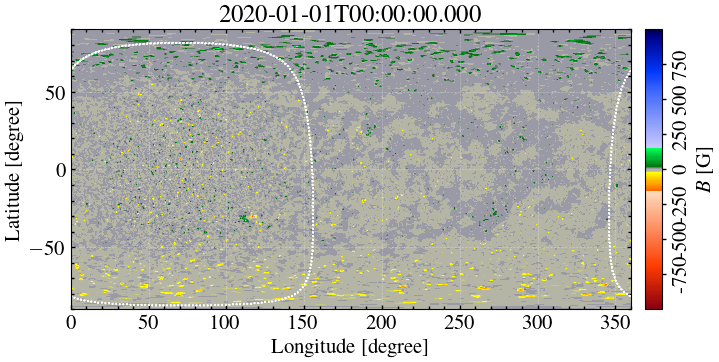

(<Figure size 700x350 with 2 Axes>,
 <Axes: title={'center': '2020-01-01T00:00:00.000'}, xlabel='Longitude [degree]', ylabel='Latitude [degree]'>)

In [54]:
aftmap1.plot()

                              AFTmap_20200101_0000.h5                              
-------------------------------------------------------------------------------------
                                    MAP CONTENTS                                     
-------------------------------------------------------------------------------------
AFTMAP    : Array                          - AFT Baseline Map.             
MAGMAP    : Array                          - Assimilated magnetogram in Carrington Grid.
MASK      : Array                          - Region of Data Assimilation.  
VLAT      : Array                          - Theta Component of flows at the surface.
VLON      : Array                          - Phi Component of flows at the surface.
-------------------------------------------------------------------------------------
                                       HEADER                                        
---------------------------------------------------------------------------

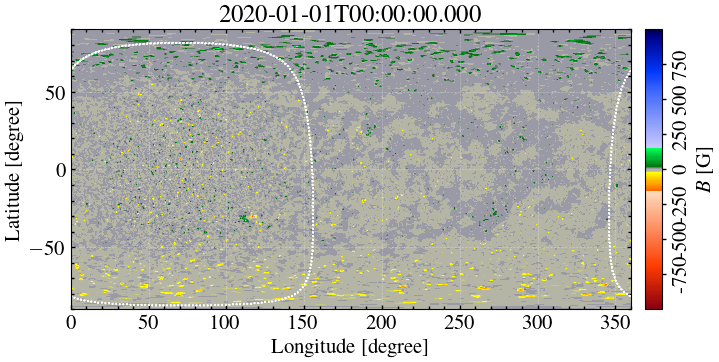

-------------------------------------------------------------------------------------


In [48]:
print(aftmap1)

In [10]:
aftdata.convert_all(outpath="/Users/bjha/Data/AFT/test_fits")

In [16]:
fl = h5.File("/Users/bjha/Data/304/AFTarmaps/armaps/2012/01/ARmap_20120101_0000.h5")

In [44]:
fl["ars/10798/lat"][()]

-22.47

In [37]:
fl.keys()

<KeysViewHDF5 ['ars', 'header', 'maps']>

In [23]:
import numpy as np
armap = fl["maps/armap"][()]
np.unique(armap)

array([    0, 10798, 10976, 11052, 11060, 11065, 11085, 11087, 11089,
       11092, 11093])

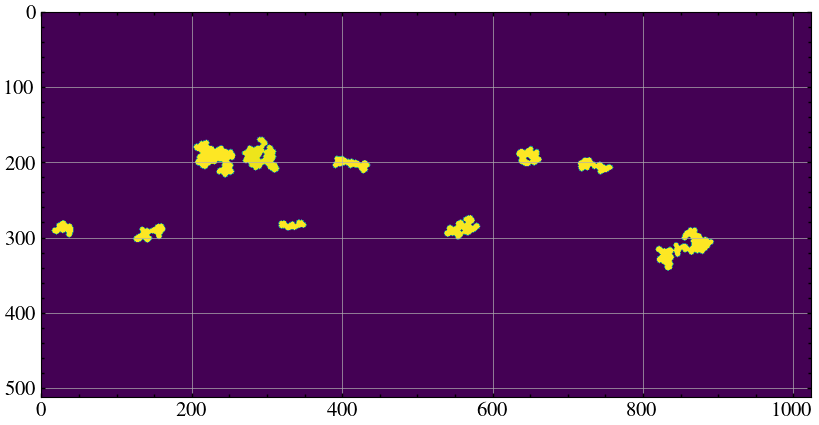

In [36]:
plt.figure(figsize=(10,5))
plt.imshow(armap)

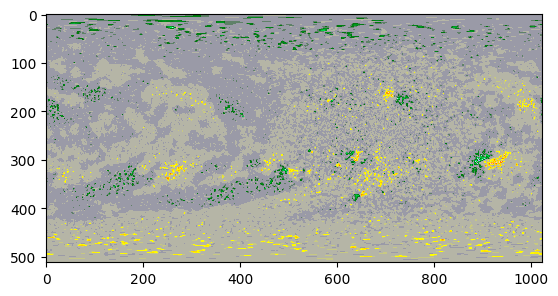

In [10]:
import matplotlib.pyplot as plt
import sunpy.visualization.colormaps
plt.imshow(bmap, vmax=1000, vmin=-1000, cmap="hmimag")

In [12]:
from astropy.io import fits

In [81]:
hdu = fits.PrimaryHDU(aftmap1.aftmap)
hdu.header.update(aftmap1.metadata)

In [83]:
hdu.writeto("~/test.fits")

In [14]:
hdu =fits.open("/Users/bjha/Data/AFT/test_fits/2020/01/AFTmap_20200101_0000.fits")

In [15]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                  512                                                  
EXTEND  =                    T                                                  
AFT_VER1= 'HMI_Baseline4'                                                       
AUTHOR  = 'Lisa A. Upton & Bibhuti K Jha'                                       
CAR_ROT =                 2225                                                  
CRLN_OBS=        70.8400191441                                                  
CRLNGEDG=                  0.0                                                  
CRLT_OBS=       -2.94618940353                                                  
CRROTEDG=                 22

In [80]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                  512                                                  
EXTEND  =                    T                                                  
AFT_VER1= 'HMI_Baseline4'                                                       
AUTHOR  = 'Lisa A. Upton & Bibhuti K Jha'                                       
CAR_ROT =                 2225                                                  
CRLN_OBS=        70.8400191441                                                  
CRLNGEDG=                  0.0                                                  
CRLT_OBS=       -2.94618940353                                                  
CRROTEDG=                 22